In [1]:
import sys
sys.path.append('../build')

In [2]:
from compugraph import test

test()

CompuGraph Testing Version 0.0.5


In [3]:
from compugraph import dot

dot()

Test BLAS and LAPACK
{{ 19.,  22.},
 { 43.,  50.}}


In [4]:
import gzip
import os
from urllib.request import urlretrieve
import numpy as np

# train-images-idx3-ubyte.gz: training set images (9912422 bytes)
# train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
# t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
# t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

def load_idx(filepath):
    with gzip.open(filepath, 'rb') as fin:
        idx_data = fin.read()
        idx = 0
        unsigned = idx_data[idx + 2] == 8
        dim = idx_data[idx + 3]
        idx += 4

        dim_shape = []
        for i in range(dim):
            dim_shape.append(int.from_bytes(idx_data[idx:idx+4], 'big', signed=False))
            idx += 4

        if unsigned:
            return np.frombuffer(idx_data[idx:], np.uint8).reshape(dim_shape)
        return None

def select_images():
    if (not os.path.exists('data')):
        os.makedirs('data')
    if (not os.path.exists('data/train-images-idx3-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'data/train-images-idx3-ubyte.gz')
    if (not os.path.exists('data/train-labels-idx1-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'data/train-labels-idx1-ubyte.gz')
    if (not os.path.exists('data/t10k-images-idx3-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 'data/t10k-images-idx3-ubyte.gz')
    if (not os.path.exists('data/t10k-labels-idx1-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 'data/t10k-labels-idx1-ubyte.gz')
    train_images_data = load_idx('data/train-images-idx3-ubyte.gz')
    train_labels_data = load_idx('data/train-labels-idx1-ubyte.gz')
    test_images_data = load_idx('data/t10k-images-idx3-ubyte.gz')
    test_labels_data = load_idx('data/t10k-labels-idx1-ubyte.gz')

    images_list = []
    labels_list = []
    for n in range(10):
        idx = np.where(train_labels_data == n)[0][:]
        images_list.append(train_images_data[idx])
        labels_list.extend(train_labels_data[idx])
    train_images = np.vstack(images_list)
    train_labels = np.vstack(labels_list).reshape(-1)
    train_labels = np.eye(10)[train_labels]

    images_list = []
    labels_list = []
    for n in range(10):
        idx = np.where(test_labels_data == n)[0][:]
        images_list.append(test_images_data[idx])
        labels_list.extend(test_labels_data[idx])
    test_images = np.vstack(images_list)
    test_labels = np.vstack(labels_list).reshape(-1)
    test_labels = np.eye(10)[test_labels]

    return train_images, train_labels, test_images, test_labels

train_images, train_labels, test_images, test_labels = select_images()

X_train = (train_images.reshape(train_images.shape[0], -1) / 255.0).astype(np.float64)
Y_train = train_labels.astype(np.float32)
X_test = (test_images.reshape(test_images.shape[0], -1) / 255.0).astype(np.float64)
Y_test = test_labels.astype(np.float64)

In [5]:
from compugraph import mlp1
import numpy as np

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

results = mlp1(X_train, Y_train, X_test, Y_test, 10)

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
X_test shape: (10000, 784)
Y_test shape: (10000, 10)
Epoch 1/10
376/375 [==============================] - loss: 2.79613 - accuracy: 0.929061 - val_loss: 2.74636 - val_accuracy: 0.927503
Epoch 2/10
376/375 [==============================] - loss: 1.80986 - accuracy: 0.962107 - val_loss: 1.95294 - val_accuracy: 0.951109
Epoch 3/10
376/375 [==============================] - loss: 1.64283 - accuracy: 0.964426 - val_loss: 1.55754 - val_accuracy: 0.954805
Epoch 4/10
376/375 [==============================] - loss: 1.61069 - accuracy: 0.971027 - val_loss: 1.5807 - val_accuracy: 0.957745
Epoch 5/10
376/375 [==============================] - loss: 1.38105 - accuracy: 0.976416 - val_loss: 1.37465 - val_accuracy: 0.961526
Epoch 6/10
376/375 [==============================] - loss: 1.18768 - accuracy: 0.97861 - val_loss: 1.19577 - val_accuracy: 0.965054
Epoch 7/10
376/375 [==============================] - loss: 0.952376 - accuracy: 0.979926 

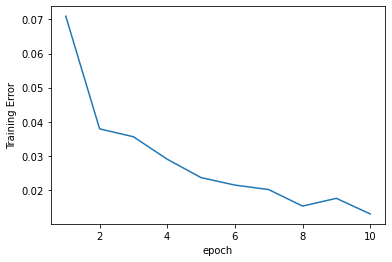

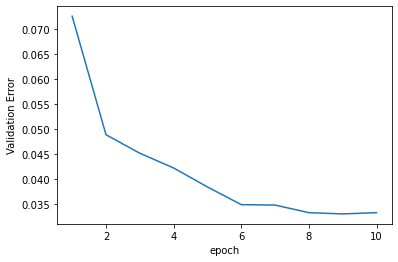

In [6]:
import matplotlib.pyplot as plt

x = list(range(1, len(results)))
train_err = [1 - results[i]['accuracy'] for i in range(0, len(results) - 1)]
val_err = [1 - results[i]['val_accuracy'] for i in range(0, len(results) - 1)]

plt.plot(x, train_err)
plt.xlabel('epoch')
plt.ylabel('Training Error')
plt.show()

plt.plot(x, val_err)
plt.xlabel('epoch')
plt.ylabel('Validation Error')
plt.show()

In [7]:
from compugraph import mlp2
import numpy as np

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

results = mlp2(X_train, Y_train, X_test, Y_test, 10)

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
X_test shape: (10000, 784)
Y_test shape: (10000, 10)
Epoch 1/10
376/375 [==============================] - loss: 4.30274 - accuracy: 0.774043 - val_loss: 4.02572 - val_accuracy: 0.774278
Epoch 2/10
376/375 [==============================] - loss: 3.4832 - accuracy: 0.904433 - val_loss: 3.65865 - val_accuracy: 0.898438
Epoch 3/10
376/375 [==============================] - loss: 2.45686 - accuracy: 0.939986 - val_loss: 2.34067 - val_accuracy: 0.933804
Epoch 4/10
376/375 [==============================] - loss: 1.69331 - accuracy: 0.949616 - val_loss: 1.66624 - val_accuracy: 0.94464
Epoch 5/10
376/375 [==============================] - loss: 1.70832 - accuracy: 0.957198 - val_loss: 1.54761 - val_accuracy: 0.947497
Epoch 6/10
376/375 [==============================] - loss: 1.6545 - accuracy: 0.949093 - val_loss: 1.53855 - val_accuracy: 0.938088
Epoch 7/10
376/375 [==============================] - loss: 1.44448 - accuracy: 0.964113 - 

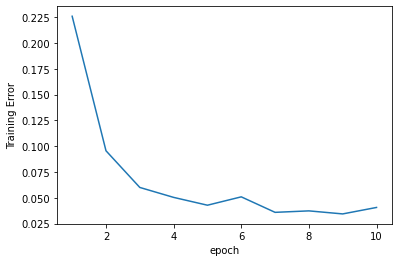

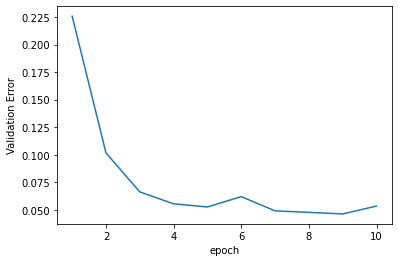

In [8]:
import matplotlib.pyplot as plt

x = list(range(1, len(results)))
train_err = [1 - results[i]['accuracy'] for i in range(0, len(results) - 1)]
val_err = [1 - results[i]['val_accuracy'] for i in range(0, len(results) - 1)]

plt.plot(x, train_err)
plt.xlabel('epoch')
plt.ylabel('Training Error')
plt.show()

plt.plot(x, val_err)
plt.xlabel('epoch')
plt.ylabel('Validation Error')
plt.show()